All of the code presented in this notoebook is derived from or based on the O'Reilly® book Introduction to Machine Learning with Python © 2017 by Andreas C. Muller and Sarah Guido. Please make sure you present the correct attestation to this book if you reference or utilize any of the information in this notebook. And please buy the book, it's excellent!

This notebook explores different ways to transofrm data to improve unsupervised learning results.

In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import mglearn

In [32]:
cancer = load_breast_cancer()
print(cancer.data.shape,cancer.target.shape)

(569, 30) (569,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


MinMaxScaler shifts the data so all features are between 0 and 1.

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler_test = MinMaxScaler().fit(X_test)
X_test_scaled = scaler_test.transform(X_test)

In [27]:
print(X_train.min(axis=0))

[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]


In [22]:
print(X_train_scaled.min(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [23]:
print(X_train.max(axis=0))

[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]


In [24]:
print(X_train_scaled.max(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [29]:
print(X_test_scaled.min(axis=0))

[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]


In [30]:
print(X_test_scaled.max(axis=0))

[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


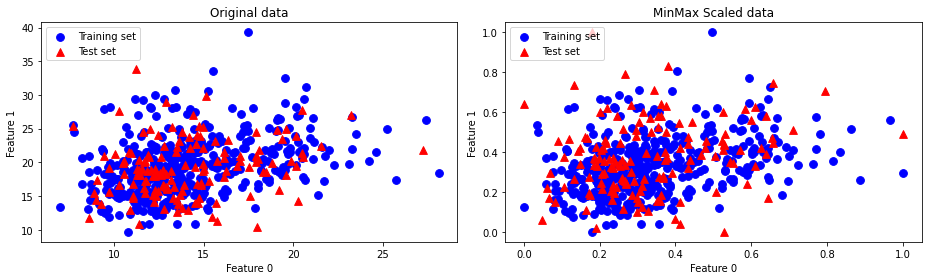

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(13,4))
axes[0].scatter(X_train[:, 0], X_train[:,1], c='b', label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:,1], c='r', label="Test set", s=60, marker='^')
axes[0].set_title("Original data")
axes[0].set_xlabel("Feature 0")
axes[0].set_ylabel("Feature 1")
axes[0].legend(loc="upper left")
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:,1], c='b', label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:,1], c='r', label="Test set", s=60, marker='^')
axes[1].set_title("MinMax Scaled data")
axes[1].set_xlabel("Feature 0")
axes[1].set_ylabel("Feature 1")
axes[1].legend(loc="upper left")
fig.tight_layout()

StandardScaler uses a mean of 0 and variance of 1 to scale data.

In [49]:
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler().fit(X_train)
X_train_std_scaled = scaler_std.transform(X_train)
scaler_test_std = StandardScaler().fit(X_test)
X_test_std_scaled = scaler_test_std.transform(X_test)

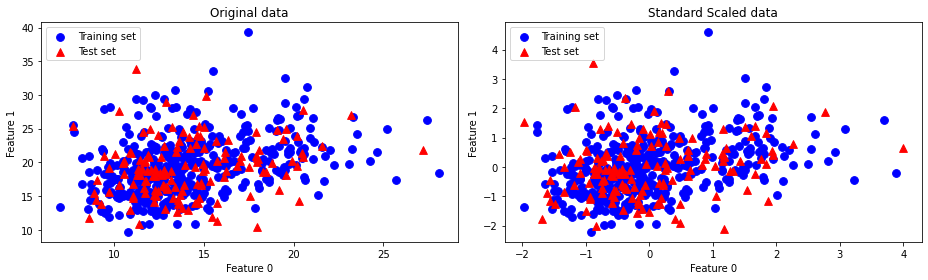

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(13,4))
axes[0].scatter(X_train[:, 0], X_train[:,1], c='b', label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:,1], c='r', label="Test set", s=60, marker='^')
axes[0].set_title("Original data")
axes[0].set_xlabel("Feature 0")
axes[0].set_ylabel("Feature 1")
axes[0].legend(loc="upper left")
axes[1].scatter(X_train_std_scaled[:, 0], X_train_std_scaled[:,1], c='b', label="Training set", s=60)
axes[1].scatter(X_test_std_scaled[:, 0], X_test_std_scaled[:,1], c='r', label="Test set", s=60, marker='^')
axes[1].set_title("Standard Scaled data")
axes[1].set_xlabel("Feature 0")
axes[1].set_ylabel("Feature 1")
axes[1].legend(loc="upper left")
fig.tight_layout()

RobustScaler uses median and quartiles, which should help ignore outliers

In [53]:
from sklearn.preprocessing import RobustScaler
scaler_r = RobustScaler().fit(X_train)
X_train_r_scaled = scaler_r.transform(X_train)
scaler_test_r = RobustScaler().fit(X_test)
X_test_r_scaled = scaler_test_r.transform(X_test)

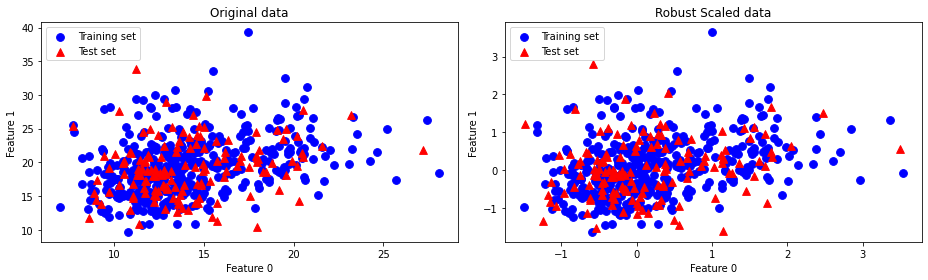

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(13,4))
axes[0].scatter(X_train[:, 0], X_train[:,1], c='b', label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:,1], c='r', label="Test set", s=60, marker='^')
axes[0].set_title("Original data")
axes[0].set_xlabel("Feature 0")
axes[0].set_ylabel("Feature 1")
axes[0].legend(loc="upper left")
axes[1].scatter(X_train_r_scaled[:, 0], X_train_r_scaled[:,1], c='b', label="Training set", s=60)
axes[1].scatter(X_test_r_scaled[:, 0], X_test_r_scaled[:,1], c='r', label="Test set", s=60, marker='^')
axes[1].set_title("Robust Scaled data")
axes[1].set_xlabel("Feature 0")
axes[1].set_ylabel("Feature 1")
axes[1].legend(loc="upper left")
fig.tight_layout()